In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch
import torch.nn as nn


## Single Layer Perceptron

## Training Loop

Epoch 0/200, Loss: 0.6932
Epoch 20/200, Loss: 0.4621
Epoch 40/200, Loss: 0.3627
Epoch 60/200, Loss: 0.3012
Epoch 80/200, Loss: 0.2590
Epoch 100/200, Loss: 0.2278
Epoch 120/200, Loss: 0.2036
Epoch 140/200, Loss: 0.1841
Epoch 160/200, Loss: 0.1681
Epoch 180/200, Loss: 0.1546


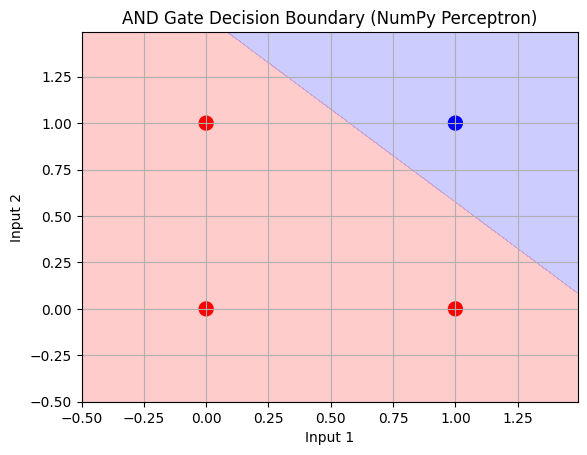

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


class Perceptron:
    def __init__(self, input_dim, lr=0.1):
        self.W = np.random.randn(input_dim, 1) * 0.01
        self.b = np.zeros((1,))
        self.lr = lr

    def forward(self, X):
        self.X = X  # cache
        self.z = np.dot(X, self.W) + self.b
        self.a = sigmoid(self.z)
        return self.a

    def backward(self, y_true):
        m = y_true.shape[0]
        dz = self.a - y_true.reshape(-1,1)
        dW = np.dot(self.X.T, dz) / m
        db = np.sum(dz) / m

        self.W -= self.lr * dW
        self.b -= self.lr * db

        # Binary cross-entropy loss
        loss = -np.mean(y_true*np.log(self.a+1e-8) + (1-y_true)*np.log(1-self.a+1e-8))
        return loss

    def predict(self, X):
        probs = sigmoid(np.dot(X, self.W) + self.b)
        return (probs > 0.5).astype(int)


def train_perceptron(model, X, y, epochs=200):
    for epoch in range(epochs):
        y_pred = model.forward(X)
        loss = model.backward(y)
        if epoch % 20 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {loss:.4f}")


data = np.array([[0,0],[0,1],[1,0],[1,1]])
target = np.array([[0],[0],[0],[1]])


model = Perceptron(input_dim=2, lr=0.5)
train_perceptron(model, data, target, epochs=200)


x_vals = np.arange(-0.5, 1.5, 0.01)
y_vals = np.arange(-0.5, 1.5, 0.01)
xx, yy = np.meshgrid(x_vals, y_vals)
grid_data = np.c_[xx.ravel(), yy.ravel()]

preds = model.predict(grid_data)


plt.contourf(xx, yy, preds.reshape(xx.shape), colors=['red','blue'], levels=[0,0.5,1], alpha=0.2)
plt.scatter(data[:,0], data[:,1], c=['red' if t==0 else 'blue' for t in target[:,0]], s=100)
plt.title("AND Gate Decision Boundary (NumPy Perceptron)")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.grid(True)
plt.show()


Epoch 0/200, Loss: 0.6921
Epoch 20/200, Loss: 0.3410
Epoch 40/200, Loss: 0.2659
Epoch 60/200, Loss: 0.2166
Epoch 80/200, Loss: 0.1819
Epoch 100/200, Loss: 0.1562
Epoch 120/200, Loss: 0.1366
Epoch 140/200, Loss: 0.1211
Epoch 160/200, Loss: 0.1086
Epoch 180/200, Loss: 0.0983


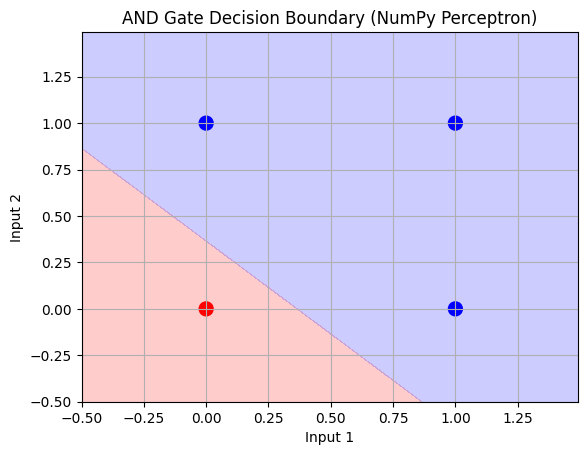

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


class Perceptron:
    def __init__(self, input_dim, lr=0.1):
        self.W = np.random.randn(input_dim, 1) * 0.01
        self.b = np.zeros((1,))
        self.lr = lr

    def forward(self, X):
        self.X = X 
        self.z = np.dot(X, self.W) + self.b
        self.a = sigmoid(self.z)
        return self.a

    def backward(self, y_true):
        m = y_true.shape[0]
        dz = self.a - y_true.reshape(-1,1)
        dW = np.dot(self.X.T, dz) / m
        db = np.sum(dz) / m

        self.W -= self.lr * dW
        self.b -= self.lr * db

        # Binary cross-entropy loss
        loss = -np.mean(y_true*np.log(self.a+1e-8) + (1-y_true)*np.log(1-self.a+1e-8))
        return loss

    def predict(self, X):
        probs = sigmoid(np.dot(X, self.W) + self.b)
        return (probs > 0.5).astype(int)


def train_perceptron(model, X, y, epochs=200):
    for epoch in range(epochs):
        y_pred = model.forward(X)
        loss = model.backward(y)
        if epoch % 20 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {loss:.4f}")


data = np.array([[0,0],[0,1],[1,0],[1,1]])
target = np.array([[0],[1],[1],[1]])


model = Perceptron(input_dim=2, lr=0.5)
train_perceptron(model, data, target, epochs=200)


x_vals = np.arange(-0.5, 1.5, 0.01)
y_vals = np.arange(-0.5, 1.5, 0.01)
xx, yy = np.meshgrid(x_vals, y_vals)
grid_data = np.c_[xx.ravel(), yy.ravel()]

preds = model.predict(grid_data)


plt.contourf(xx, yy, preds.reshape(xx.shape), colors=['red','blue'], levels=[0,0.5,1], alpha=0.2)
plt.scatter(data[:,0], data[:,1], c=['red' if t==0 else 'blue' for t in target[:,0]], s=100)
plt.title("AND Gate Decision Boundary (NumPy Perceptron)")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.grid(True)
plt.show()


Epoch 0/200, Loss: 0.6931
Epoch 20/200, Loss: 0.6931
Epoch 40/200, Loss: 0.6931
Epoch 60/200, Loss: 0.6931
Epoch 80/200, Loss: 0.6931
Epoch 100/200, Loss: 0.6931
Epoch 120/200, Loss: 0.6931
Epoch 140/200, Loss: 0.6931
Epoch 160/200, Loss: 0.6931
Epoch 180/200, Loss: 0.6931


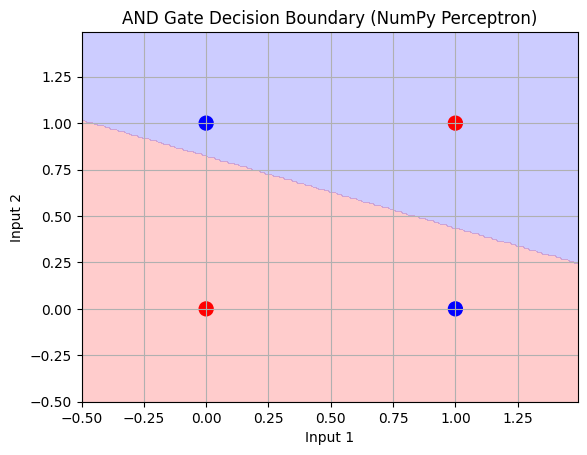

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


class Perceptron:
    def __init__(self, input_dim, lr=0.1):
        self.W = np.random.randn(input_dim, 1) * 0.01
        self.b = np.zeros((1,))
        self.lr = lr

    def forward(self, X):
        self.X = X 
        self.z = np.dot(X, self.W) + self.b
        self.a = sigmoid(self.z)
        return self.a

    def backward(self, y_true):
        m = y_true.shape[0]
        dz = self.a - y_true.reshape(-1,1)
        dW = np.dot(self.X.T, dz) / m
        db = np.sum(dz) / m

        self.W -= self.lr * dW
        self.b -= self.lr * db

        # Binary cross-entropy loss
        loss = -np.mean(y_true*np.log(self.a+1e-8) + (1-y_true)*np.log(1-self.a+1e-8))
        return loss

    def predict(self, X):
        probs = sigmoid(np.dot(X, self.W) + self.b)
        return (probs > 0.5).astype(int)


def train_perceptron(model, X, y, epochs=200):
    for epoch in range(epochs):
        y_pred = model.forward(X)
        loss = model.backward(y)
        if epoch % 20 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {loss:.4f}")


data = np.array([[0,0],[0,1],[1,0],[1,1]])
target = np.array([[0],[1],[1],[0]])


model = Perceptron(input_dim=2, lr=0.5)
train_perceptron(model, data, target, epochs=200)


x_vals = np.arange(-0.5, 1.5, 0.01)
y_vals = np.arange(-0.5, 1.5, 0.01)
xx, yy = np.meshgrid(x_vals, y_vals)
grid_data = np.c_[xx.ravel(), yy.ravel()]

preds = model.predict(grid_data)


plt.contourf(xx, yy, preds.reshape(xx.shape), colors=['red','blue'], levels=[0,0.5,1], alpha=0.2)
plt.scatter(data[:,0], data[:,1], c=['red' if t==0 else 'blue' for t in target[:,0]], s=100)
plt.title("AND Gate Decision Boundary (NumPy Perceptron)")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.grid(True)
plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


class Perceptron:
    def __init__(self, input_dim, lr=0.1):
        self.W = np.random.randn(input_dim, 2) * 0.01
        self.z = np.random.randn(2, 1) * 0.01
        self.b = np.zeros((2,))
        self.lr = lr

    def forward(self, X):
        self.X = X 
        self.z[0] = np.dot(X[0], self.W[0,0]) + self.b[0]
        self.z[1] = np.dot(X[1], self.W[0,1]) + self.b[1]
        self.o = np.dot(self.z[0], self.W[1,0]) + np.dot(self.z[1], self.W[1,1])
        self.a = sigmoid(self.o)
        return self.a

    def backward(self, y_true):
        m = y_true.shape[0]
        dz = self.a - y_true.reshape(-1,1)
        dW = np.dot(self.X.T, dz) / m
        db = np.sum(dz) / m

        self.W -= self.lr * dW
        self.b -= self.lr * db

        # Binary cross-entropy loss
        loss = -np.mean(y_true*np.log(self.a+1e-8) + (1-y_true)*np.log(1-self.a+1e-8))
        return loss

    def predict(self, X):
        probs = sigmoid(np.dot(X, self.W) + self.b)
        return (probs > 0.5).astype(int)


def train_perceptron(model, X, y, epochs=200):
    for epoch in range(epochs):
        y_pred = model.forward(X)
        loss = model.backward(y)
        if epoch % 20 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {loss:.4f}")


data = np.array([[0,0],[0,1],[1,0],[1,1]])
target = np.array([[0],[1],[1],[0]])


model = Perceptron(input_dim=2, lr=0.5)
train_perceptron(model, data, target, epochs=200)


x_vals = np.arange(-0.5, 1.5, 0.01)
y_vals = np.arange(-0.5, 1.5, 0.01)
xx, yy = np.meshgrid(x_vals, y_vals)
grid_data = np.c_[xx.ravel(), yy.ravel()]

preds = model.predict(grid_data)


plt.contourf(xx, yy, preds.reshape(xx.shape), colors=['red','blue'], levels=[0,0.5,1], alpha=0.2)
plt.scatter(data[:,0], data[:,1], c=['red' if t==0 else 'blue' for t in target[:,0]], s=100)
plt.title("AND Gate Decision Boundary (NumPy Perceptron)")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.grid(True)
plt.show()


ValueError: could not broadcast input array from shape (2,) into shape (1,)